# Checking power spectrum from different methods to compute small-$\theta$ pairs

In [1]:
import os
import sys

import numpy as np
from matplotlib import pyplot as plt
from pypower import CatalogFFTPower

sys.path.append('../bin')
from local_file_manager import LocalFileName

# plotting
plt.style.use(os.path.join(os.path.abspath('../bin'), 'plot_style.mplstyle'))
plots_dir = '../../plots/'

## Load power spectrum

In [2]:
# tracer
tracer = 'ELG_LOP'
region = 'SGC'
zrange = (1.1, 1.6)
completeness = 'complete'

# mocks/version
version = 'v4_1'
imocks = range(25)

# multipoles
ells = (0, 2, 4)

# cut
thetacut = 0.05

fn = LocalFileName().set_default_config(version=version, tracer=tracer, region=region, zrange=zrange, completeness=completeness, weighting='default_FKP', thetacut=thetacut, nran=4, cellsize=6, boxsize=9000)

In [3]:
fn.get_path()

'/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/v4_1/pk/power_mock0_ELG_LOP_complete_SGC_z1.1-1.6_default_FKP_nran4_cellsize6_boxsize9000_thetacut0.05_directedges_max5000.npy'

In [4]:
rebin = 5

In [5]:
power_direct_max100 = CatalogFFTPower.load(fn.get_path(directedges=True, directmax=100))
power_direct_max5000 = CatalogFFTPower.load(fn.get_path(directedges=True, directmax=5000))
power = CatalogFFTPower.load(fn.get_path(directedges=False))

poles_direct_max100 = power_direct_max100.poles.slice(slice(0, (len(power_direct_max100.poles.k) // rebin) * rebin, rebin))
poles_direct_max5000 = power_direct_max5000.poles.slice(slice(0, (len(power_direct_max5000.poles.k) // rebin) * rebin, rebin))
poles = power.poles.slice(slice(0, (len(power.poles.k) // rebin) * rebin, rebin))

## Plot

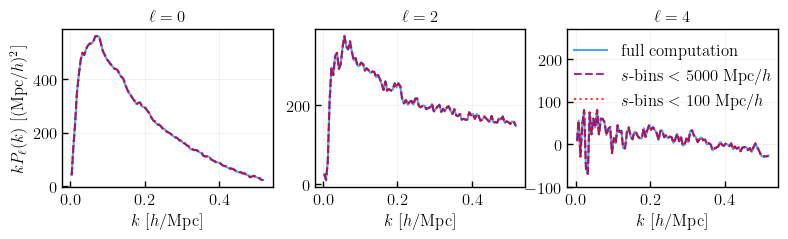

In [18]:
plt.rcParams["figure.autolayout"] = False
fig, axes = plt.subplots(1, 3, figsize=(8, 2.5), sharey=False)

for i, ell in enumerate(ells):
    axes[i].plot(poles.k, poles.k * poles(ell=ells, complex=False)[i], color='dodgerblue', ls='-', alpha=0.8, label=r'full computation')
    axes[i].plot(poles_direct_max5000.k, poles_direct_max5000.k * poles_direct_max5000(ell=ells, complex=False)[i], color='purple', ls='--', alpha=0.8, label=r'$s$-bins $< 5000 \; \mathrm{Mpc}/h$')
    axes[i].plot(poles_direct_max100.k, poles_direct_max100.k * poles_direct_max100(ell=ells, complex=False)[i], color='red', ls=':', alpha=0.8, label=r'$s$-bins $< 100 \; \mathrm{Mpc}/h$')
    axes[i].set_xlabel(r'$k$  [$h$/Mpc]')
    axes[i].set_title(r'$\ell={}$'.format(ell))
axes[2].set_ylim((-100, 270))
axes[0].set_ylabel(r'$k P_{\ell}(k)$ [$(\mathrm{Mpc}/h)^{2}$]')
axes[2].legend(loc='upper center')
plt.tight_layout()
plt.subplots_adjust(wspace=0.2)
plt.savefig(os.path.join(plots_dir, version, 'power_sbinning_complete_thetacut{}_{}_{}_z{:.2f}-{:.2f}_mock0.pdf'.format(thetacut, tracer, region, zrange[0], zrange[1])), dpi=200)
plt.show()